In [7]:
import cv2
from matplotlib import pyplot as plt


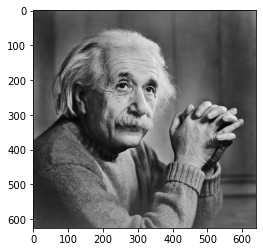

In [12]:
image = cv2.imread("einstein.jpg",1)
plt.imshow(image)


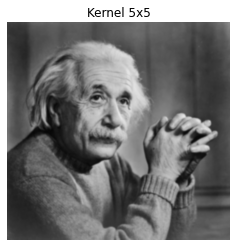

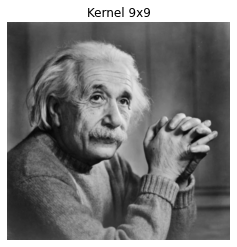

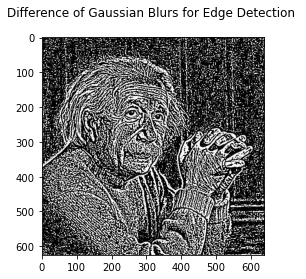

In [13]:
blur_gaus1 = cv2.GaussianBlur(image,(9,9),0)
blur_gaus2 = cv2.GaussianBlur(image,(5,5),0)
diff = blur_gaus1 - blur_gaus2
plt.figure(),plt.axis("off"),plt.title("Kernel 5x5"),plt.imshow(blur_gaus1)
plt.figure(),plt.axis("off"),plt.title("Kernel 9x9"),plt.imshow(blur_gaus2)
plt.figure(),plt.imshow(diff)
plt.title('Difference of Gaussian Blurs for Edge Detection \n')
plt.show()

## Problem Statement 2 : 

In [14]:
barrel = cv2.imread('media/barrel.jpg')
barrel_hsv = cv2.cvtColor(barrel, cv2.COLOR_BGR2HSV)

target_hist = cv2.calcHist([barrel_hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
cv2.normalize(target_hist, target_hist, 0, 255, cv2.NORM_MINMAX)

array([[9.503106, 1.583851, 4.751553, ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       ...,
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ]],
      dtype=float32)

In [ ]:

cap = cv2.VideoCapture('video.mp4')

while cap.isOpened():
  ret, frame = cap.read()
  frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
  res = cv2.calcBackProject([frame_hsv], [0, 1], target_hist, [0, 180, 0, 256], 1)
  disc= cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
  cv2.filter2D(res, -1, disc, res)
  _,thresh = cv2.threshold(res, 50,255,0)
  final = cv2.merge((thresh, thresh, thresh))
  result = cv2.bitwise_and(frame, final)
  plt.imshow(result)
  if cv2.waitKey(30) == 27:
    break
    
cv2.destroyAllWindows()    